In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sqlalchemy import create_engine
import seaborn as sns

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

# Temp

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

temp_df = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

* First, load the dataset from the **weatherinszeged** table from Thinkful's database.
* Build a regression model where the target variable is *temperature*. As explanatory variables, use *humidity*, *windspeed*, *windbearing*, and *pressure*. Estimate the model using OLS.
* Now, check if your model meets the Gauss-Markov Conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

In [3]:
temp_df.columns

Index(['date', 'summary', 'preciptype', 'temperature', 'apparenttemperature',
       'humidity', 'windspeed', 'windbearing', 'visibility', 'loudcover',
       'pressure', 'dailysummary'],
      dtype='object')

In [4]:
Y = temp_df['temperature']
X = temp_df[['humidity', 'windspeed','windbearing','pressure']]

lrm = linear_model.LinearRegression()

lrm.fit(X,Y)


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 77162
The number of observations in test set is 19291


In [5]:
X_train = sm.add_constant(X_train)

In [6]:
# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            temperature   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.401e+04
Date:                Wed, 05 Feb 2020   Prob (F-statistic):               0.00
Time:                        19:17:44   Log-Likelihood:            -2.6253e+05
No. Observations:               77162   AIC:                         5.251e+05
Df Residuals:                   77157   BIC:                         5.251e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          38.0043      0.259    146.683      

## Error Term

In [7]:
predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: -6.282637831541205e-15


## Linearity of Model with Coefficients

Text(0, 0.5, 'Observed')

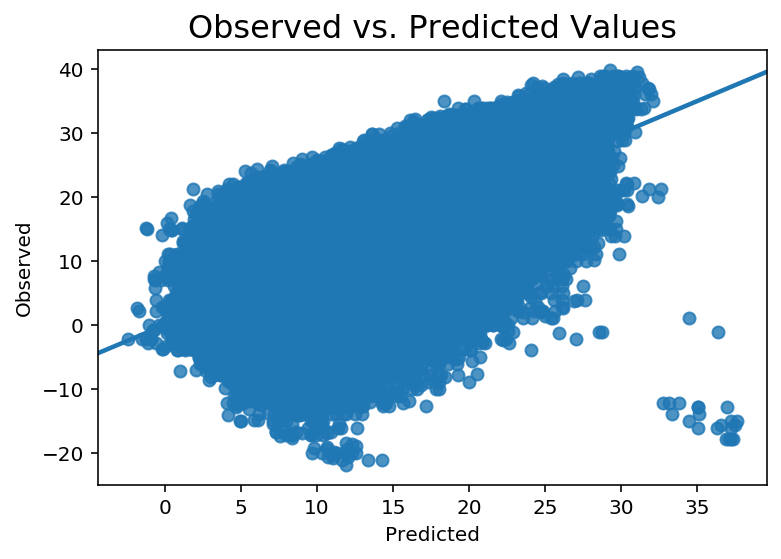

In [8]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms

sns.regplot(x=predictions, y=Y)
plt.title('Observed vs. Predicted Values', fontsize=16)
plt.xlabel('Predicted') 
plt.ylabel('Observed')

## Homoscedasticity

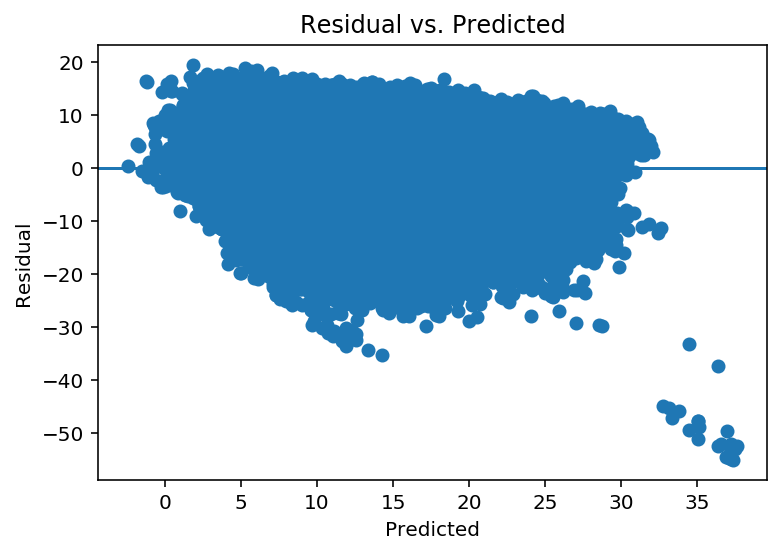

In [9]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

## Multicollinearity

In [10]:
temp_df[['humidity', 'windspeed','windbearing','pressure', 'temperature']].corr()

,humidity,windspeed,windbearing,pressure,temperature
humidity,1.000,-0.225,0.001,0.005,-0.632
windspeed,-0.225,1.000,0.104,-0.049,0.009
windbearing,0.001,0.104,1.000,-0.012,0.030
pressure,0.005,-0.049,-0.012,1.000,-0.005
temperature,-0.632,0.009,0.030,-0.005,1.000


## Error Terms Not Correlated

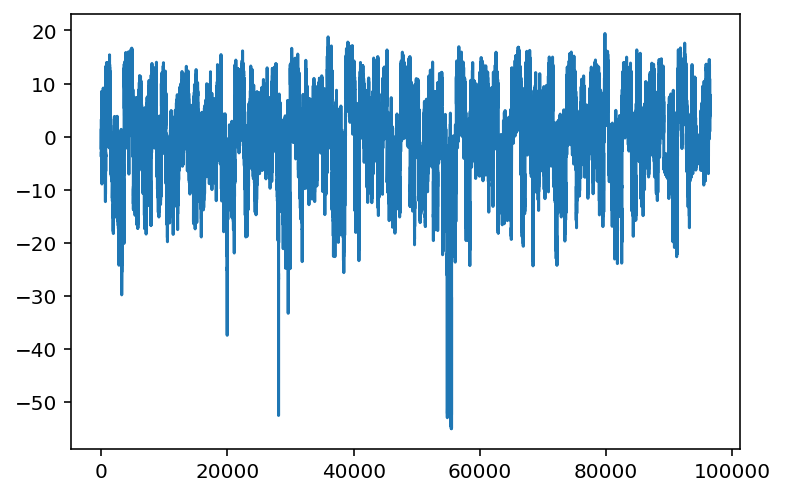

In [11]:
plt.plot(errors)
plt.show()

# Housing

In [31]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

housing_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

* Load the **houseprices** data from Thinkful's database. 
* Reimplement the model you built in the previous checkpoint. 
* Check for all of the assumptions above and discuss the implications if some of the assumptions are not met.
*  be sure to close the database connection after initially pulling in your data.

In [32]:
chosen_features = ['mszoning', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'saletype',
       'salecondition', 'overallqual', 'grlivarea', 'garagecars', 'garagearea' ,'totalbsmtsf',
        'firstflrsf','fullbath','totrmsabvgrd','yearbuilt','yearremodadd','garageyrblt', 'saleprice', 'yrsold', 'mosold']

housing_df = housing_df[chosen_features]

In [33]:
housing_df = housing_df.dropna()

In [34]:
housing_df = pd.get_dummies(housing_df, drop_first = True)

In [47]:
Y = housing_df['saleprice']
X = housing_df.drop(columns = ['saleprice'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

# We fit an OLS model using sklearn
lrm = LinearRegression()
lrm.fit(X_train, y_train)

The number of observations in training set is 4
The number of observations in test set is 2


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
X_train = sm.add_constant(X_train)

In [49]:
# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Wed, 05 Feb 2020   Prob (F-statistic):                nan
Time:                        19:27:08   Log-Likelihood:                 80.858
No. Observations:                   4   AIC:                            -153.7
Df Residuals:                       0   BIC:                            -156.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0299 

## Error Term

In [50]:
predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: 10068.224129787975


## Linearity of Model with Coefficients

Text(0, 0.5, 'Observed')

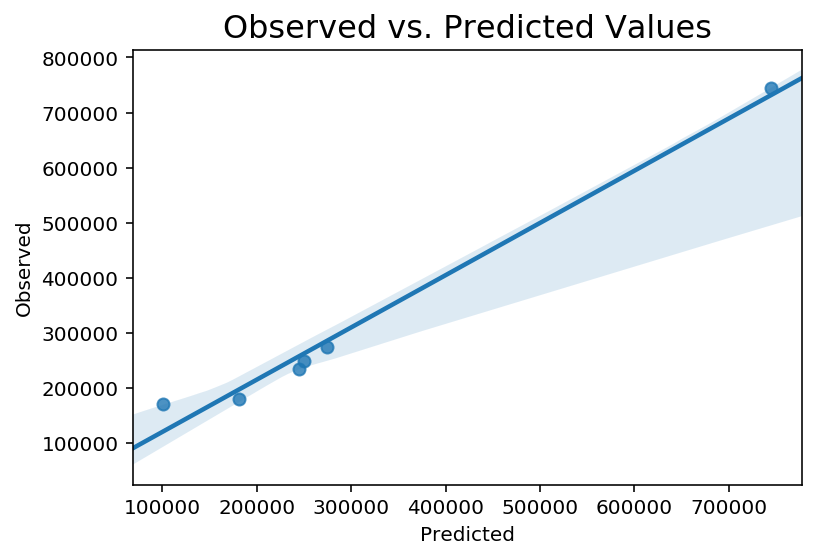

In [51]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms

sns.regplot(x=predictions, y=Y)
plt.title('Observed vs. Predicted Values', fontsize=16)
plt.xlabel('Predicted') 
plt.ylabel('Observed')

## Homoscedasticity

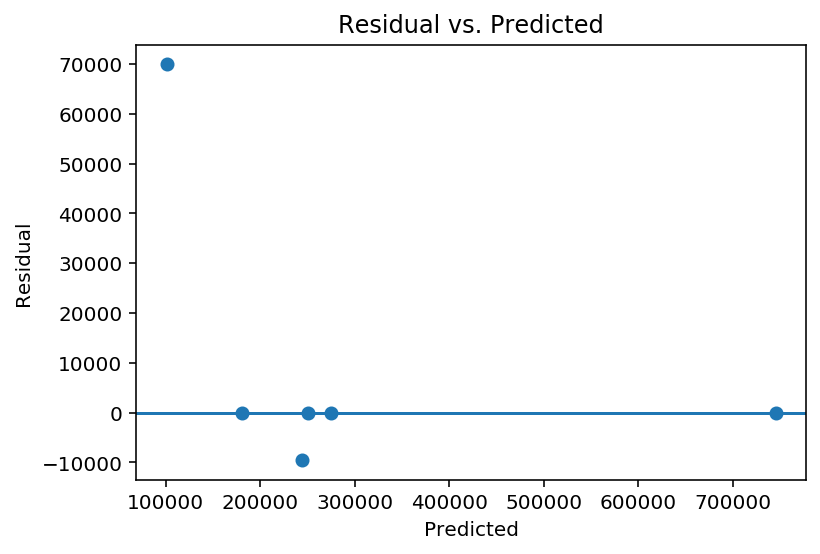

In [40]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

## Multicollinearity

In [41]:
temp_df[['humidity', 'windspeed','windbearing','pressure', 'temperature']].corr()

,humidity,windspeed,windbearing,pressure,temperature
humidity,1.000,-0.225,0.001,0.005,-0.632
windspeed,-0.225,1.000,0.104,-0.049,0.009
windbearing,0.001,0.104,1.000,-0.012,0.030
pressure,0.005,-0.049,-0.012,1.000,-0.005
temperature,-0.632,0.009,0.030,-0.005,1.000


## Error Terms Not Correlated

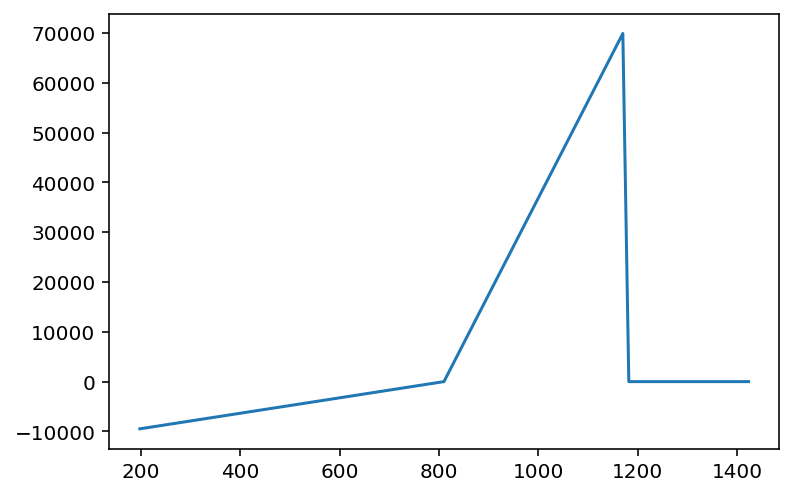

In [42]:
plt.plot(errors)
plt.show()

Something went wrong with the housing model